<h1> <center>Analysing asthma problem in California residents</center></h1>

When the data is provided for any analysing it is always mixed and non-uniform in nature. 
Before starting any new data analysis project it is important that we have a certain business decision to make.In this manner we can categorize our data according to our need.<br> In the following asthama dataset information related to counts and rates (per 10,000 residents) of asthma (ICD9-CM, 493.0-493.9) emergency department visits among California residents by County and age group (all ages, 0-17, 18+) is present. <br>
The key result that we need to find out from the data set are:
1. Analyze Geography in relation to Lghc Indicator Id
2. Study the influence of Age Group on Numerator <br>
Let us create our model to find the answer to above query

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import glob
from scipy.stats import skew, kurtosis
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/asthma-ed-visit-rates-lghc-indicatore/asthma-ed-visit-rates-lghc-indicator-07-.csv
/kaggle/input/asthma-ed-visit-rates-lghc-indicatore/asthma-ed-visit-rates-lghc-indicator-1.csv
/kaggle/input/asthma-ed-visit-rates-lghc-indicatore/asthma-emergency-department-visit-rates-by-county-in-2012-description.pdf
/kaggle/input/asthma-ed-visit-rates-lghc-indicatore/asthma-ed-visit-rates-lghc-indicator-4.pdf
/kaggle/input/asthma-ed-visit-rates-lghc-indicatore/asthma-ed-visit-rates-lghc-indicator-2.xlsx
/kaggle/input/asthma-ed-visit-rates-lghc-indicatore/asthma-ed-visit-rates-lghc-indicator-07-dd.xlsx
/kaggle/input/asthma-ed-visit-rates-lghc-indicatore/datapackage.json
/kaggle/input/asthma-ed-visit-rates-lghc-indicatore/resource_links.md


In [2]:
file = glob.glob("/kaggle/input/asthma-ed-visit-rates-lghc-indicatore/*.csv")
len(file)

2

In [3]:
df = []
for f in file:
    df_temp = pd.read_csv(f)
    print(df_temp.shape)
    df.append(df_temp)
frame = pd.concat(df, keys = [1, 2])
frame

(9425, 11)
(9484, 11)


index    LGHC Indicator Name   Geography  Year    Age Group  \
1 0         0  Asthma ED Visit Rates     Alameda  2015  18 and Over   
  1         1  Asthma ED Visit Rates      Amador  2015  18 and Over   
  2         2  Asthma ED Visit Rates       Butte  2015  18 and Over   
  3         3  Asthma ED Visit Rates   Calaveras  2015  18 and Over   
  4         4  Asthma ED Visit Rates  California  2015  18 and Over   
...       ...                    ...         ...   ...          ...   
2 9479   9479  Asthma ED Visit Rates      Tulare  2019     Under 18   
  9480   9480  Asthma ED Visit Rates    Tuolumne  2019     Under 18   
  9481   9481  Asthma ED Visit Rates     Ventura  2019     Under 18   
  9482   9482  Asthma ED Visit Rates        Yolo  2019     Under 18   
  9483   9483  Asthma ED Visit Rates        Yuba  2019     Under 18   

                  Strata  Strata Name Numerator  Rate  LGHC Indicator ID  \
1 0     Total Population  18 and Over     6,513  53.1                  7   
  1     Total Population  18 and Over       151  49.1                  7   
  2     Total Population  18 and Over       736  43.8                  7   
  3     Total Population  18 and Over       139  42.7                  7   
  4     Total Population  18 and Over   117,854  40.0                  7   
...                  ...          ...       ...   ...                ...   
2 9479               Sex         Male       597  81.2                  7   
  9480               Sex         Male        37  90.0                  7   
  9481               Sex         Male       602  61.0                  7   
  9482               Sex         Male       135  52.4                  7   
  9483               Sex         Male        59  52.9                  7   

        LGHC Target Rate  
1 0                   28  
  1                   28  
  2                   28  
  3                   28  
  4                   28  
...                  ...  
2 9479                28  
  9480                28  
  9481                28  
  9482                28  
  9483                28  

[18909 rows x 11 columns]

Before moving forward with the analysis it is impportant to know what types of variables are we dealing with. 

In [4]:
frame = frame.loc[1]

In [5]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9425 entries, 0 to 9424
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                9425 non-null   int64  
 1   LGHC Indicator Name  9425 non-null   object 
 2   Geography            9425 non-null   object 
 3   Year                 9425 non-null   int64  
 4   Age Group            9425 non-null   object 
 5   Strata               9425 non-null   object 
 6   Strata Name          9425 non-null   object 
 7   Numerator            9425 non-null   object 
 8   Rate                 9316 non-null   float64
 9   LGHC Indicator ID    9425 non-null   int64  
 10  LGHC Target Rate     9425 non-null   int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 883.6+ KB


Here we see that the column named **Numerator** is present as the object instead of the int64. So we need to convert this column type to numerator

In [6]:
frame["Numerator"] = frame["Numerator"].str.replace(",", "").astype(int)
frame

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,index,LGHC Indicator Name,Geography,Year,Age Group,Strata,Strata Name,Numerator,Rate,LGHC Indicator ID,LGHC Target Rate
0,0,Asthma ED Visit Rates,Alameda,2015,18 and Over,Total Population,18 and Over,6513,53.1,7,28
1,1,Asthma ED Visit Rates,Amador,2015,18 and Over,Total Population,18 and Over,151,49.1,7,28
2,2,Asthma ED Visit Rates,Butte,2015,18 and Over,Total Population,18 and Over,736,43.8,7,28
3,3,Asthma ED Visit Rates,Calaveras,2015,18 and Over,Total Population,18 and Over,139,42.7,7,28
4,4,Asthma ED Visit Rates,California,2015,18 and Over,Total Population,18 and Over,117854,40.0,7,28
...,...,...,...,...,...,...,...,...,...,...,...
9420,9420,Asthma ED Visit Rates,Tulare,2019,Under 18,Sex,Male,597,81.2,7,28
9421,9421,Asthma ED Visit Rates,Tuolumne,2019,Under 18,Sex,Male,37,90.0,7,28
9422,9422,Asthma ED Visit Rates,Ventura,2019,Under 18,Sex,Male,602,61.0,7,28
9423,9423,Asthma ED Visit Rates,Yolo,2019,Under 18,Sex,Male,135,52.4,7,28


In [7]:
# check for null values
frame.isnull().sum()

index                    0
LGHC Indicator Name      0
Geography                0
Year                     0
Age Group                0
Strata                   0
Strata Name              0
Numerator                0
Rate                   109
LGHC Indicator ID        0
LGHC Target Rate         0
dtype: int64

In [8]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9425 entries, 0 to 9424
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                9425 non-null   int64  
 1   LGHC Indicator Name  9425 non-null   object 
 2   Geography            9425 non-null   object 
 3   Year                 9425 non-null   int64  
 4   Age Group            9425 non-null   object 
 5   Strata               9425 non-null   object 
 6   Strata Name          9425 non-null   object 
 7   Numerator            9425 non-null   int64  
 8   Rate                 9316 non-null   float64
 9   LGHC Indicator ID    9425 non-null   int64  
 10  LGHC Target Rate     9425 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 883.6+ KB


Now let us divide our variable as continious or categorical. From the dataframe we obtain the following results:
1. Categorical variables:<br>
    a. Strata Name<br>
    b. Age Group<br>
    c. Strata<br>
    d. Geography<br>
2. Continious variables: <br>
    a. Numerator<br>
    b. Rate<br>

# Univariate Analysis
The methods to perform univariate analysis depends on the type of variables. If they are continoius or categorical variable. There are 3 types of statistics that we are intrested in each univariable variable.
1. General information: datatype, number of unique values, count of values etc
2. Range and middle: mean, median, mode, min, max, quartile
3. Normality and spread: standard deviation, skewness, kurtosis

The normality of the variable provide its feseability for the predictive analysis. If the variable spread is Gaussian then it will have no outliers and no skewness and we can say that is it stable

In [9]:
# general information
for i in frame.columns:
    print(f"The unique values for {i} column: \n", frame[i].unique())
    print()
    

The unique values for index column: 
 [   0    1    2 ... 9422 9423 9424]

The unique values for LGHC Indicator Name column: 
 ['Asthma ED Visit Rates']

The unique values for Geography column: 
 ['Alameda' 'Amador' 'Butte' 'Calaveras' 'California' 'Colusa'
 'Contra Costa' 'Del Norte' 'El Dorado' 'Fresno' 'Glenn' 'Humboldt'
 'Imperial' 'Inyo' 'Kern' 'Kings' 'Lake' 'Lassen' 'Los Angeles' 'Madera'
 'Marin' 'Mariposa' 'Mendocino' 'Merced' 'Modoc' 'Mono' 'Monterey' 'Napa'
 'Nevada' 'Orange' 'Placer' 'Plumas' 'Riverside' 'Sacramento' 'San Benito'
 'San Bernardino' 'San Diego' 'San Francisco' 'San Joaquin'
 'San Luis Obispo' 'San Mateo' 'Santa Barbara' 'Santa Clara' 'Santa Cruz'
 'Shasta' 'Siskiyou' 'Solano' 'Sonoma' 'Stanislaus' 'Sutter' 'Tehama'
 'Trinity' 'Tulare' 'Tuolumne' 'Ventura' 'Yolo' 'Yuba' 'Sierra' 'Humbolt']

The unique values for Year column: 
 [2015 2014 2013 2012 2011 2016 2017 2018 2019 2021 2020]

The unique values for Age Group column: 
 ['18 and Over' 'All Ages' 'Under 18

In [10]:
# range and middle (descriptive statistics)
# only numerical variables are included
frame.describe()

,index,Year,Numerator,Rate,LGHC Indicator ID,LGHC Target Rate
count,9425.000000,9425.000000,9425.000000,9316.000000,9425.0,9425.0
mean,4712.000000,2015.013687,2014.324562,67.205603,7.0,28.0
std,2720.907477,2.573933,9453.381439,86.222507,0.0,0.0
min,0.000000,2011.000000,7.000000,6.000000,7.0,28.0
25%,2356.000000,2013.000000,58.000000,34.000000,7.0,28.0
50%,4712.000000,2015.000000,257.000000,49.100000,7.0,28.0
75%,7068.000000,2017.000000,959.000000,71.700000,7.0,28.0
max,9424.000000,2021.000000,191904.000000,4564.100000,7.0,28.0


In [11]:
# We can select what numerical varaibles we need in our descriptive analysis
frame[["Numerator", "Rate", "LGHC Indicator ID", "LGHC Target Rate"]].describe()

,Numerator,Rate,LGHC Indicator ID,LGHC Target Rate
count,9425.000000,9316.000000,9425.0,9425.0
mean,2014.324562,67.205603,7.0,28.0
std,9453.381439,86.222507,0.0,0.0
min,7.000000,6.000000,7.0,28.0
25%,58.000000,34.000000,7.0,28.0
50%,257.000000,49.100000,7.0,28.0
75%,959.000000,71.700000,7.0,28.0
max,191904.000000,4564.100000,7.0,28.0


Breif overview of the different functions:
1. **count**: total number of variable present under each column
2. **mean**: it is the aruthmetic mean or average of total variable
3. **std**: As the names says deviation from the standard line. It tells you how spread out the data is from the mean
4. **min**: the lowest value in all variable under given column
5.**25%**, **50%**, **75%**: the qurtiles telling amount of data under each as per their values
6. **max**: the highest value in all variable under given column

In [12]:
for i in frame[["Numerator", "Rate", "LGHC Indicator ID", "LGHC Target Rate"]]:
    print(f"The value of median for column {i}: \n", frame[i].median())

The value of median for column Numerator: 
 257.0
The value of median for column Rate: 
 49.1
The value of median for column LGHC Indicator ID: 
 7.0
The value of median for column LGHC Target Rate: 
 28.0


Observations:
1. We can see that some rows are missing RATE column as we calculated above.
2. The 25% quartile represent that out of 100 records 25 records have value less than the give value at 25% in the dataset
3. The value for 50% and median are same

In [13]:
import plotly.express as px
fig = px.box(frame, x="Numerator")
fig.show()

The box plot shows a perfect way represent the descriptive analysis of the numerical variable. Here we have take the column NUMERATOR. From this we can arrive at following results:
1. The outliers are are present in the data
2. Highly concentrated i.e. values of min, q2, median and q3 lies closely


# Normality and spread:
The two primary measure for the abnormality are skewness and kurtosis
1. Skewness: measure how much the bulk of the data is measured towards right or left of the x-axis. To define the skewness as left or right look at the tail of the curve. If the tail is towards right than right skewed curve. <br>
    a. right skew: skewness score is positive <br>
    b. left skew: skewness score is negative <br>
    c. no skew: skewness score is zero <br>
  if skewness is within -1 <sk< 1 than we can consider out data as normal<br>
2. Kurtosis: measures how high or low the peak of the data is:<br>
    a. high: S<sub>ku</sub> > 0 <br>
    b. low: S<sub>ku</sub> < 0 <br>
    c. normal: S<sub>ku</sub> = 0 <br>

In [14]:
print("Skewness",skew(frame.Numerator, bias = False))
print("Kurtosis",kurtosis( frame.Numerator, bias = False))

Skewness 11.09206510721386
Kurtosis 158.17805273939567


In [15]:
import plotly.express as px
fig = px.histogram(frame, x="Numerator")
fig.show()

The above graph shows that data for Numerator column is highly centered around (0-499) with the count of around 6000 values. Also the tail of the curve is towards right so we can say that data is right skewed. The above graphical representation can be calculated with the following pandas function.

In [16]:
frame["Numerator"].value_counts()

11       105
12       101
14        97
13        72
17        68
        ... 
5848       1
1096       1
1232       1
28793      1
661        1
Name: Numerator, Length: 2730, dtype: int64

In [17]:
# Categorical variable
frame["Age Group"].value_counts()

All Ages       3355
18 and Over    3193
Under 18       2875
Under 20          1
Under 19          1
Name: Age Group, dtype: int64

In [18]:
fig = px.histogram(frame, x="Age Group")
fig.show()

The above shows the distribution under 5 different categories.

<AxesSubplot:>

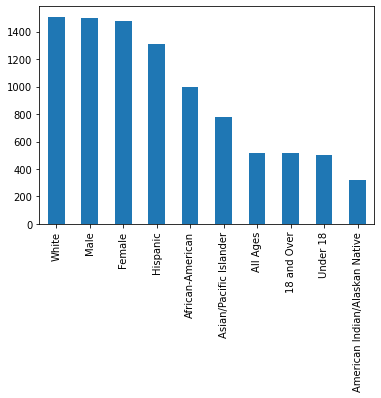

In [19]:
frame["Strata Name"].value_counts().head(10).plot.bar()

In [20]:
def label_age(age):
    if age == "Under 18":
        age = 1
    elif age == "Under 19":
        age == 2
    elif age == "Under 20":
        age = 3
    elif age == "18 and Over":
        age = 4
    else:
        age == 5
    return age
frame["label_age"] = frame["Age Group"].apply(lambda x : label_age(x))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
frame

,index,LGHC Indicator Name,Geography,Year,Age Group,Strata,Strata Name,Numerator,Rate,LGHC Indicator ID,LGHC Target Rate,label_age
0,0,Asthma ED Visit Rates,Alameda,2015,18 and Over,Total Population,18 and Over,6513,53.1,7,28,4
1,1,Asthma ED Visit Rates,Amador,2015,18 and Over,Total Population,18 and Over,151,49.1,7,28,4
2,2,Asthma ED Visit Rates,Butte,2015,18 and Over,Total Population,18 and Over,736,43.8,7,28,4
3,3,Asthma ED Visit Rates,Calaveras,2015,18 and Over,Total Population,18 and Over,139,42.7,7,28,4
4,4,Asthma ED Visit Rates,California,2015,18 and Over,Total Population,18 and Over,117854,40.0,7,28,4
...,...,...,...,...,...,...,...,...,...,...,...,...
9420,9420,Asthma ED Visit Rates,Tulare,2019,Under 18,Sex,Male,597,81.2,7,28,1
9421,9421,Asthma ED Visit Rates,Tuolumne,2019,Under 18,Sex,Male,37,90.0,7,28,1
9422,9422,Asthma ED Visit Rates,Ventura,2019,Under 18,Sex,Male,602,61.0,7,28,1
9423,9423,Asthma ED Visit Rates,Yolo,2019,Under 18,Sex,Male,135,52.4,7,28,1


In [22]:
frame["Strata Name"].unique()

array(['18 and Over', 'African-American',
       'American Indian/Alaskan Native', 'Asian/Pacific Islander',
       'Hispanic', 'White', 'Female', 'Male', 'All Ages', 'Under 18'],
      dtype=object)

<BarContainer object of 9425 artists>

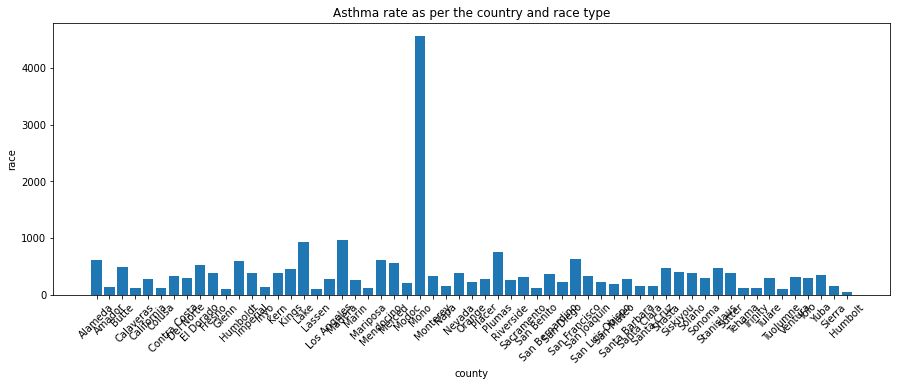

In [23]:
# asthma rate in different strata

y = frame["Rate"]
x = frame["Geography"]
plt.figure(figsize = (15, 5))
plt.title("Asthma rate as per the country and race type")
plt.xlabel("county")
plt.ylabel("race")

plt.xticks(rotation = 45)

plt.bar(x, y)
